### Player group (team) dataset preparation

In [1]:
import os
from collections import Counter

import pandas as pd
%matplotlib inline

from generate_histograms import RgbHistogramsGenerator, HsvHistogramsGenerator, OnPartsHistogramsGenerator

In [2]:
src_path = 'groups_to_cluster_from_tracker/arsenal__0-74__groups/'
files = sorted([src_path + x for x in os.listdir(src_path)])

### Create feature dataset

In [3]:
# different scenarios - generation of different type of image feature vectors (based on histograms)
SCENARIO_NUMBER = 2

In [4]:
feature_generation_scenarios = {
    1: {'generator': RgbHistogramsGenerator, 'params': {'set_mask': False,'crop_coefficient': 0}},
    2: {'generator': RgbHistogramsGenerator, 'params': {'set_mask': True, 'crop_coefficient': 0}},
    3: {'generator': RgbHistogramsGenerator, 'params': {'set_mask': False, 'crop_coefficient': 0.2}},
    4: {'generator': HsvHistogramsGenerator, 'params': {'set_mask': False, 'crop_coefficient': 0}},
    5: {'generator': OnPartsHistogramsGenerator, 'params': {'set_mask': False, 'crop_coefficient': 0}}}

most frequent is [ 44.5817123  119.11914261 100.86194193]


Counter({0: 74, 1: 740, 2: 740})

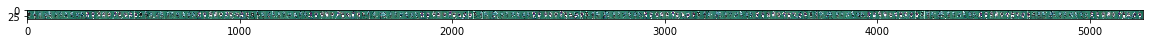

In [5]:
generate_histograms = feature_generation_scenarios[SCENARIO_NUMBER]['generator'](
    **feature_generation_scenarios[SCENARIO_NUMBER]['params'])
hist_files = generate_histograms.get_representations(files)
X_df = pd.DataFrame(hist_files)
y_df = pd.Series([[person_type in f for person_type in ["referee", "team1", "team2"]].index(True) for f in files])
Counter(y_df)

### Drawing images

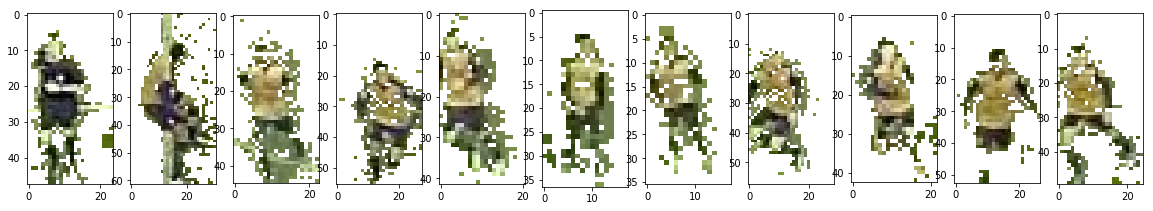

In [6]:
generate_histograms.show_images(files[:11])

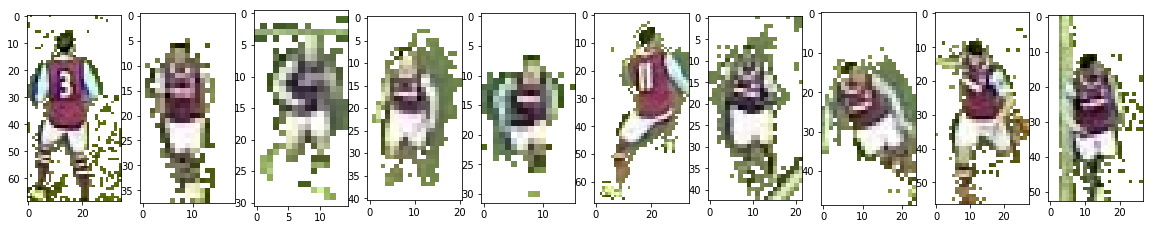

In [7]:
generate_histograms.show_images(files[11:21])

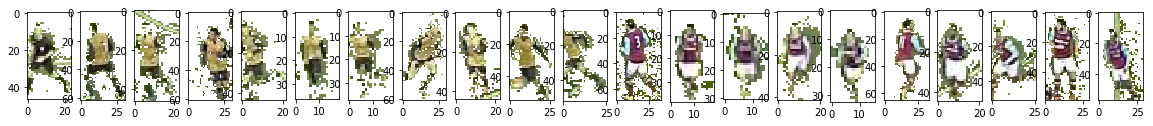

In [8]:
generate_histograms.show_images(files[21*10: 21*11])

### Visualize histogram feature-vectors and save dataset

In [9]:
player_ids = [0, 2, 11]
X_df.loc[player_ids]

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.037326,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.017361,0.018229,...,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.618924
2,0.001932,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.008696,0.019324,...,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.563285
11,0.004969,0.005797,0.0,0.0,0.0,0.0,0.0,0.0,0.001656,0.009938,...,0.000828,0.00207,0.0,0.0,0.0,0.0,0.0,0.0,0.014907,0.546170


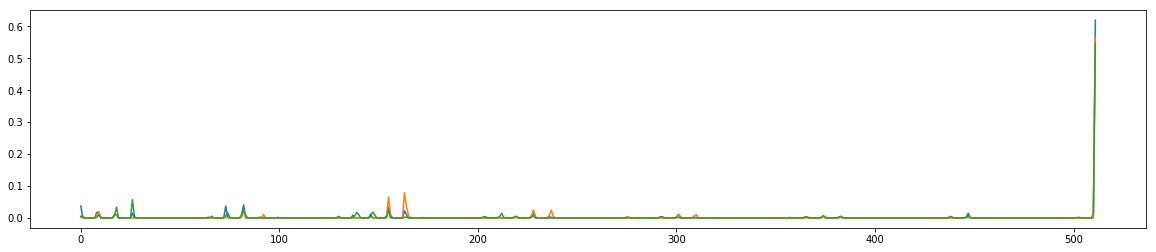

In [10]:
generate_histograms.show_histograms([files[i] for i in player_ids])

In [11]:
X_df.to_pickle("X_df")
y_df.to_pickle("y_df")